#### importing libraries

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from predict_evaluate import model

from removeoutliers import remove_outliers
from plot_confusionmatrix import plot_confusion_matrix

import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../datasets/vehicles.csv')
# read file

In [3]:
data.head()
# quick overview

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [4]:
data.info()
# more info about data lenght and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [5]:
data.describe().T
# quick overview of the data

,count,mean,std,min,25%,50%,75%,max
COMPACTNESS,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
CIRCULARITY,846.0,44.861702,6.169866,33.0,40.00,44.0,49.0,59.0
DISTANCE_CIRCULARITY,846.0,82.088652,15.771533,40.0,70.00,80.0,98.0,112.0
RADIUS_RATIO,846.0,168.940898,33.472183,104.0,141.00,167.0,195.0,333.0
PR.AXIS_ASPECT_RATIO,846.0,61.693853,7.888251,47.0,57.00,61.0,65.0,138.0
MAX.LENGTH_ASPECT_RATIO,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
SCATTER_RATIO,846.0,168.839243,33.244978,112.0,146.25,157.0,198.0,265.0
ELONGATEDNESS,846.0,40.933806,7.811560,26.0,33.00,43.0,46.0,61.0
PR.AXIS_RECTANGULARITY,846.0,20.582742,2.592138,17.0,19.00,20.0,23.0,29.0
MAX.LENGTH_RECTANGULARITY,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [6]:
data.isnull().sum()
# check for missing values

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

In [7]:
data.Class.value_counts()
# check value counts

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

In [8]:
data['Class'].unique()
# unquie value

array(['van', 'saab', 'bus', 'opel'], dtype=object)

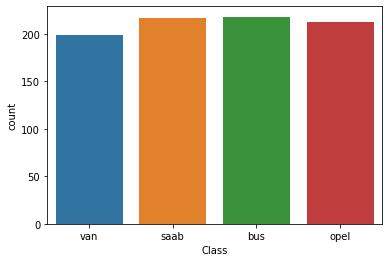

In [9]:
sns.countplot(data.Class)
plt.show()
# coutplot of each of the observations in **Class**

In [10]:
# data.groupby(by='Class').count()

### Checking for outliers and removing them using Interquartile Range Rule

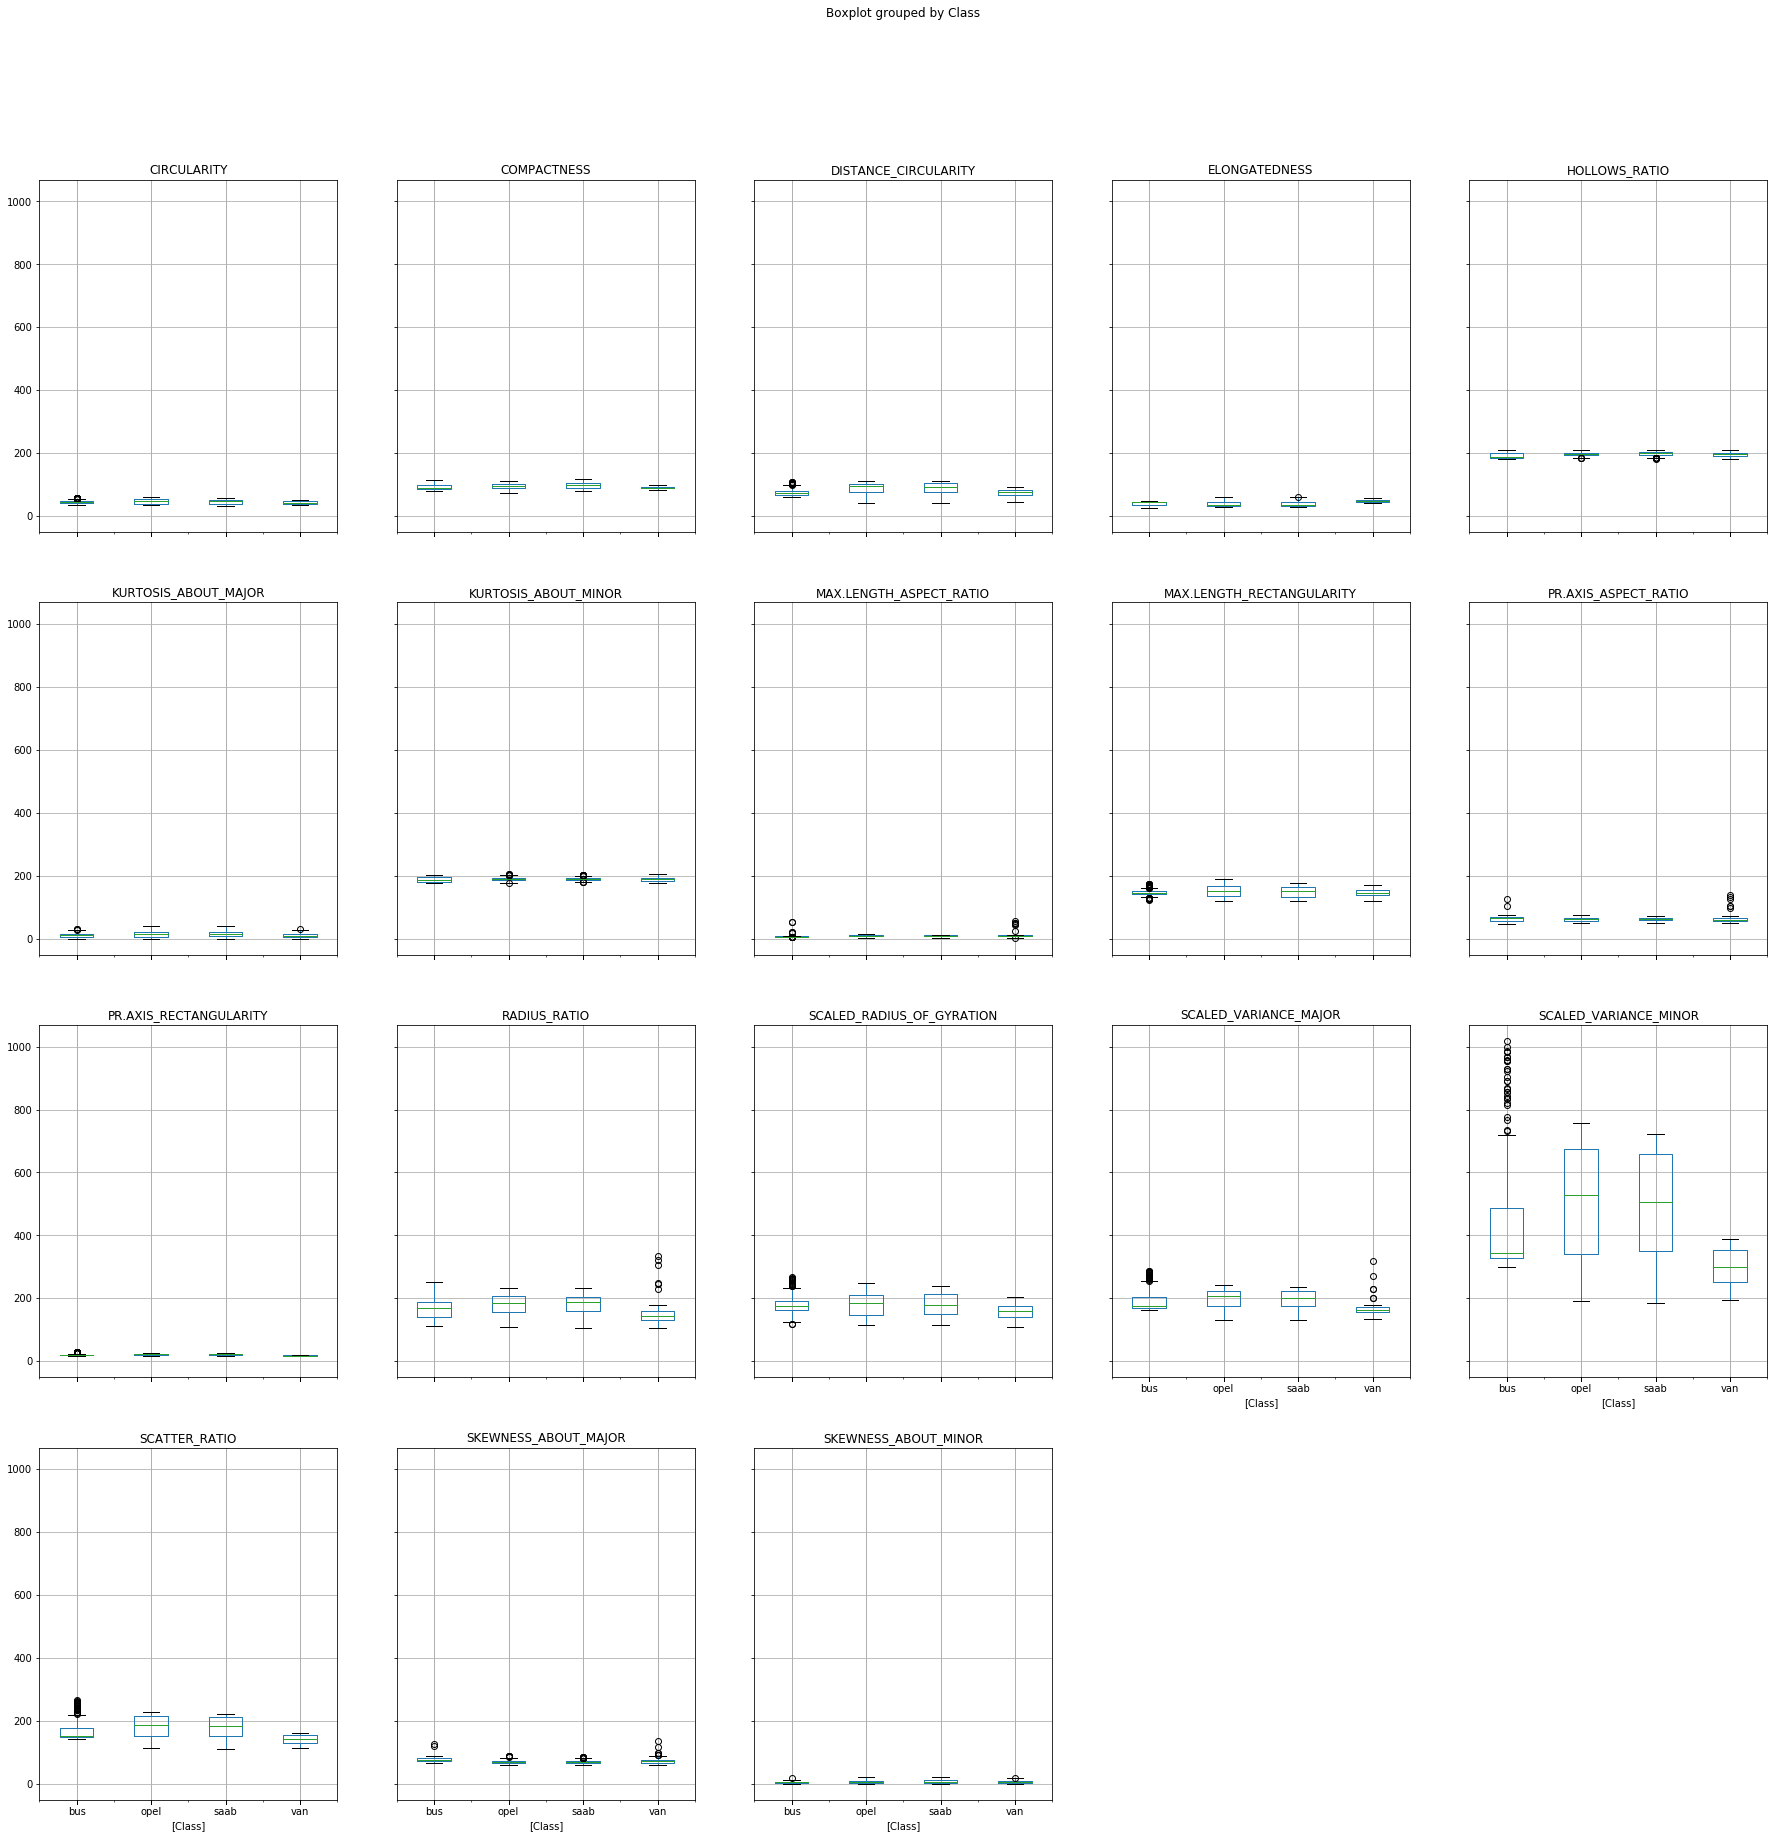

In [11]:
data.boxplot(by='Class', layout=(4,5), figsize=(30, 30))
plt.show()

In [12]:
# extract columns

data_columns = data.columns.values
data_columns

array(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY',
       'RADIUS_RATIO', 'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO',
       'SCATTER_RATIO', 'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY',
       'MAX.LENGTH_RECTANGULARITY', 'SCALED_VARIANCE_MAJOR',
       'SCALED_VARIANCE_MINOR', 'SCALED_RADIUS_OF_GYRATION',
       'SKEWNESS_ABOUT_MAJOR', 'SKEWNESS_ABOUT_MINOR',
       'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR', 'HOLLOWS_RATIO',
       'Class'], dtype=object)

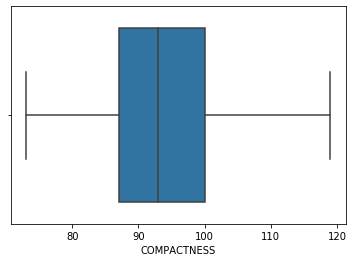

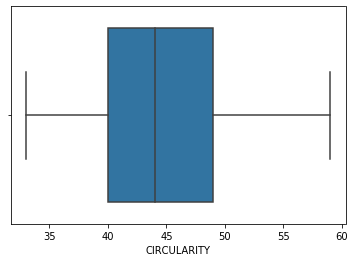

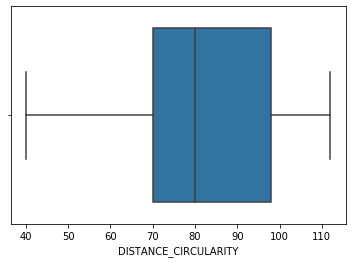

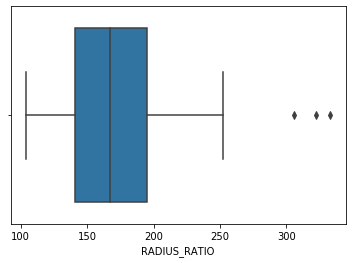

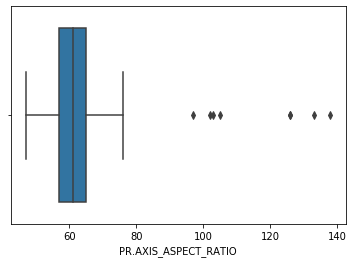

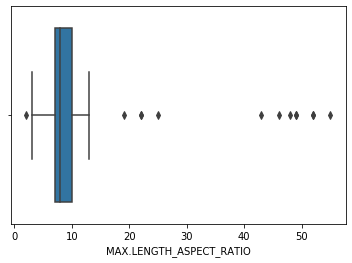

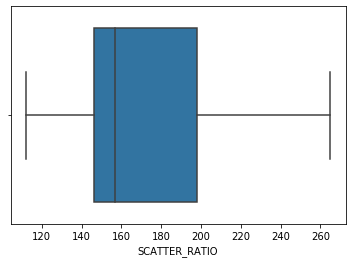

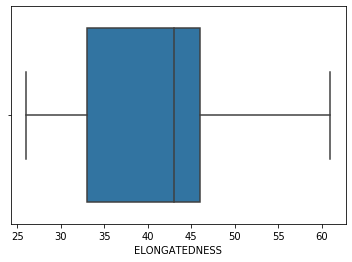

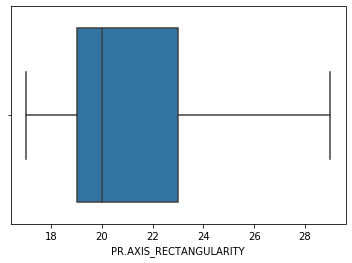

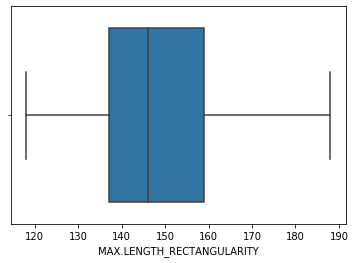

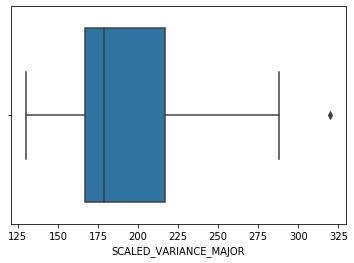

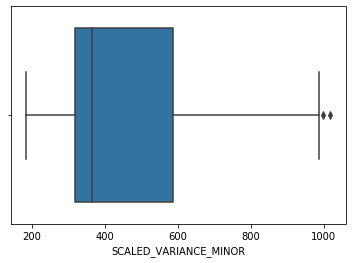

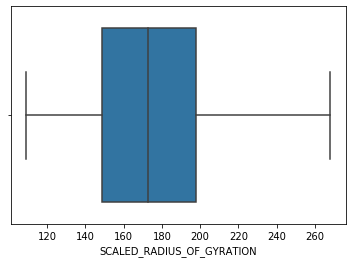

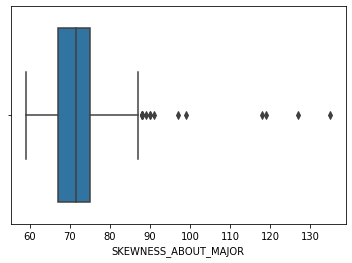

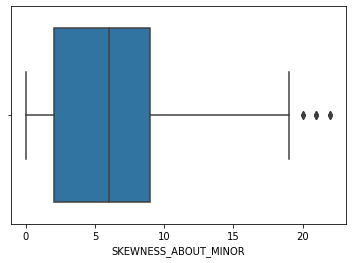

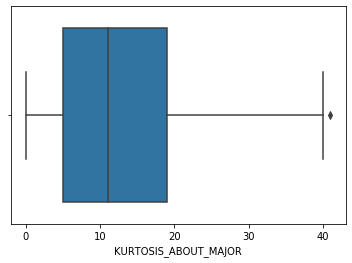

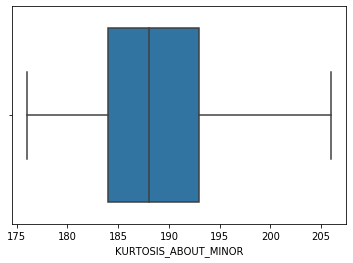

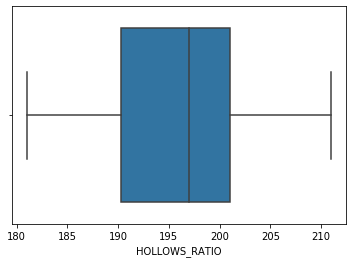

In [13]:
for i, column in enumerate(data_columns[:-1]):
    plt.figure(i)
    sns.boxplot(data[column])
#Checking  Outliers plot



In [14]:
data.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')

In [15]:
data_df = data.copy()

In [16]:
data_df = remove_outliers('RADIUS_RATIO', data_df)
data_df = remove_outliers('PR.AXIS_ASPECT_RATIO',data_df)
data_df = remove_outliers('MAX.LENGTH_ASPECT_RATIO',data_df)
data_df = remove_outliers('SCALED_VARIANCE_MAJOR',data_df)
data_df = remove_outliers('SCALED_VARIANCE_MINOR',data_df)
data_df = remove_outliers('SKEWNESS_ABOUT_MAJOR',data_df)
data_df = remove_outliers('SKEWNESS_ABOUT_MINOR',data_df)
data_df = remove_outliers('KURTOSIS_ABOUT_MAJOR',data_df)

# calling remove outliers functon


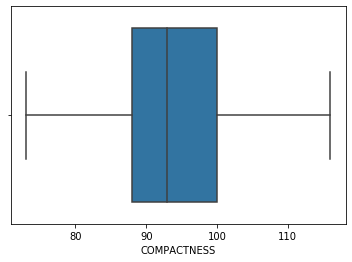

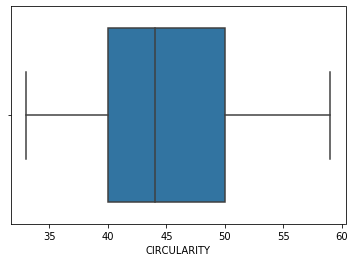

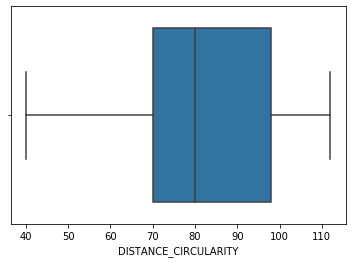

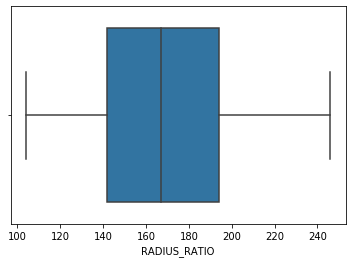

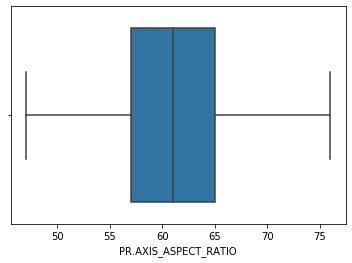

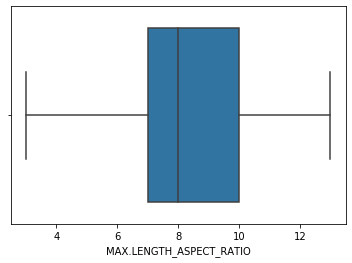

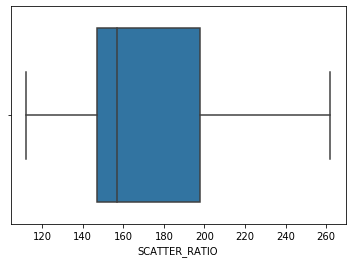

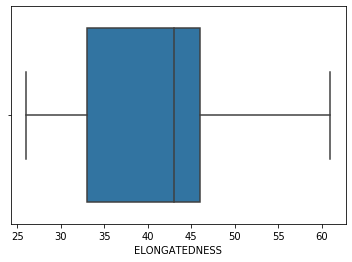

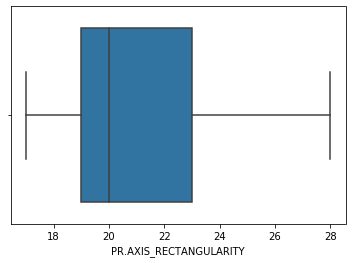

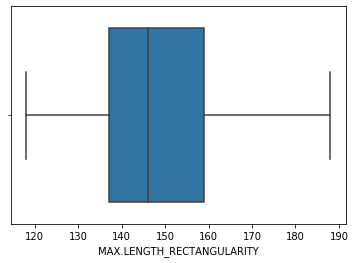

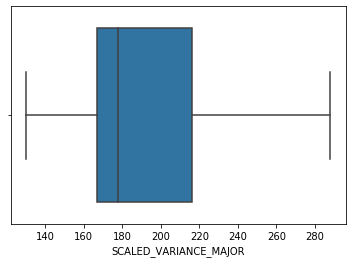

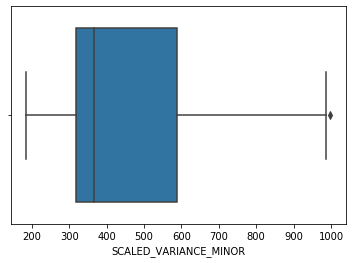

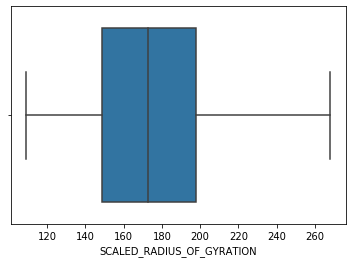

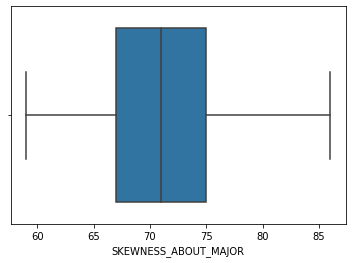

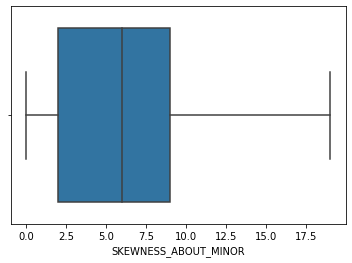

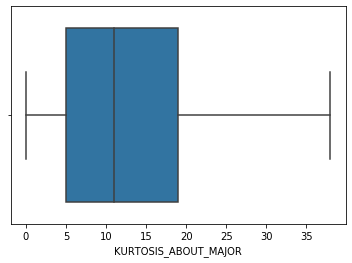

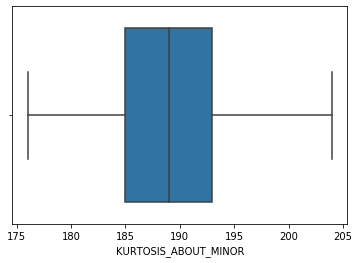

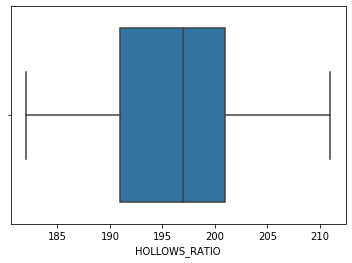

In [17]:
# outlier free data
for i, column in enumerate(data_df.columns.values[:-1]):
    plt.figure(i)
    sns.boxplot(data_df[column])

In [18]:
data_df.corr()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
COMPACTNESS,1.000000,0.686912,0.785869,0.743329,0.192906,0.486861,0.809900,-0.786057,0.810531,0.671443,0.792614,0.816369,0.579301,-0.232906,0.193587,0.153644,0.275323,0.346519
CIRCULARITY,0.686912,1.000000,0.792860,0.642067,0.195184,0.553945,0.856566,-0.822797,0.855587,0.965742,0.815431,0.849946,0.936423,0.098337,0.141203,-0.018929,-0.144219,0.017661
DISTANCE_CIRCULARITY,0.785869,0.792860,1.000000,0.809584,0.239352,0.661564,0.907905,-0.908667,0.897822,0.766982,0.886630,0.891815,0.704662,-0.216096,0.093123,0.259049,0.103910,0.304640
RADIUS_RATIO,0.743329,0.642067,0.809584,1.000000,0.665080,0.444058,0.792737,-0.846736,0.766085,0.575150,0.797095,0.782728,0.555931,-0.378702,0.033219,0.178002,0.397149,0.485358
PR.AXIS_ASPECT_RATIO,0.192906,0.195184,0.239352,0.665080,1.000000,0.124408,0.196226,-0.298796,0.163391,0.143368,0.211448,0.183271,0.154733,-0.304683,-0.056450,-0.042706,0.392483,0.408517
MAX.LENGTH_ASPECT_RATIO,0.486861,0.553945,0.661564,0.444058,0.124408,1.000000,0.492693,-0.495006,0.493574,0.645833,0.406590,0.455746,0.405272,-0.304560,0.082269,0.124844,0.024790,0.374798
SCATTER_RATIO,0.809900,0.856566,0.907905,0.792737,0.196226,0.492693,1.000000,-0.974194,0.991958,0.807410,0.980974,0.996518,0.797268,0.026498,0.057121,0.211327,-0.025085,0.100105
ELONGATEDNESS,-0.786057,-0.822797,-0.908667,-0.846736,-0.298796,-0.495006,-0.974194,1.000000,-0.951716,-0.767751,-0.966963,-0.958555,-0.763538,0.062066,-0.037750,-0.180795,-0.080981,-0.193501
PR.AXIS_RECTANGULARITY,0.810531,0.855587,0.897822,0.766085,0.163391,0.493574,0.991958,-0.951716,1.000000,0.812143,0.968110,0.992103,0.795335,0.041502,0.065556,0.214039,-0.050088,0.080173
MAX.LENGTH_RECTANGULARITY,0.671443,0.965742,0.766982,0.575150,0.143368,0.645833,0.807410,-0.767751,0.812143,1.000000,0.750102,0.796537,0.867306,0.075476,0.132993,-0.005287,-0.141698,0.052902


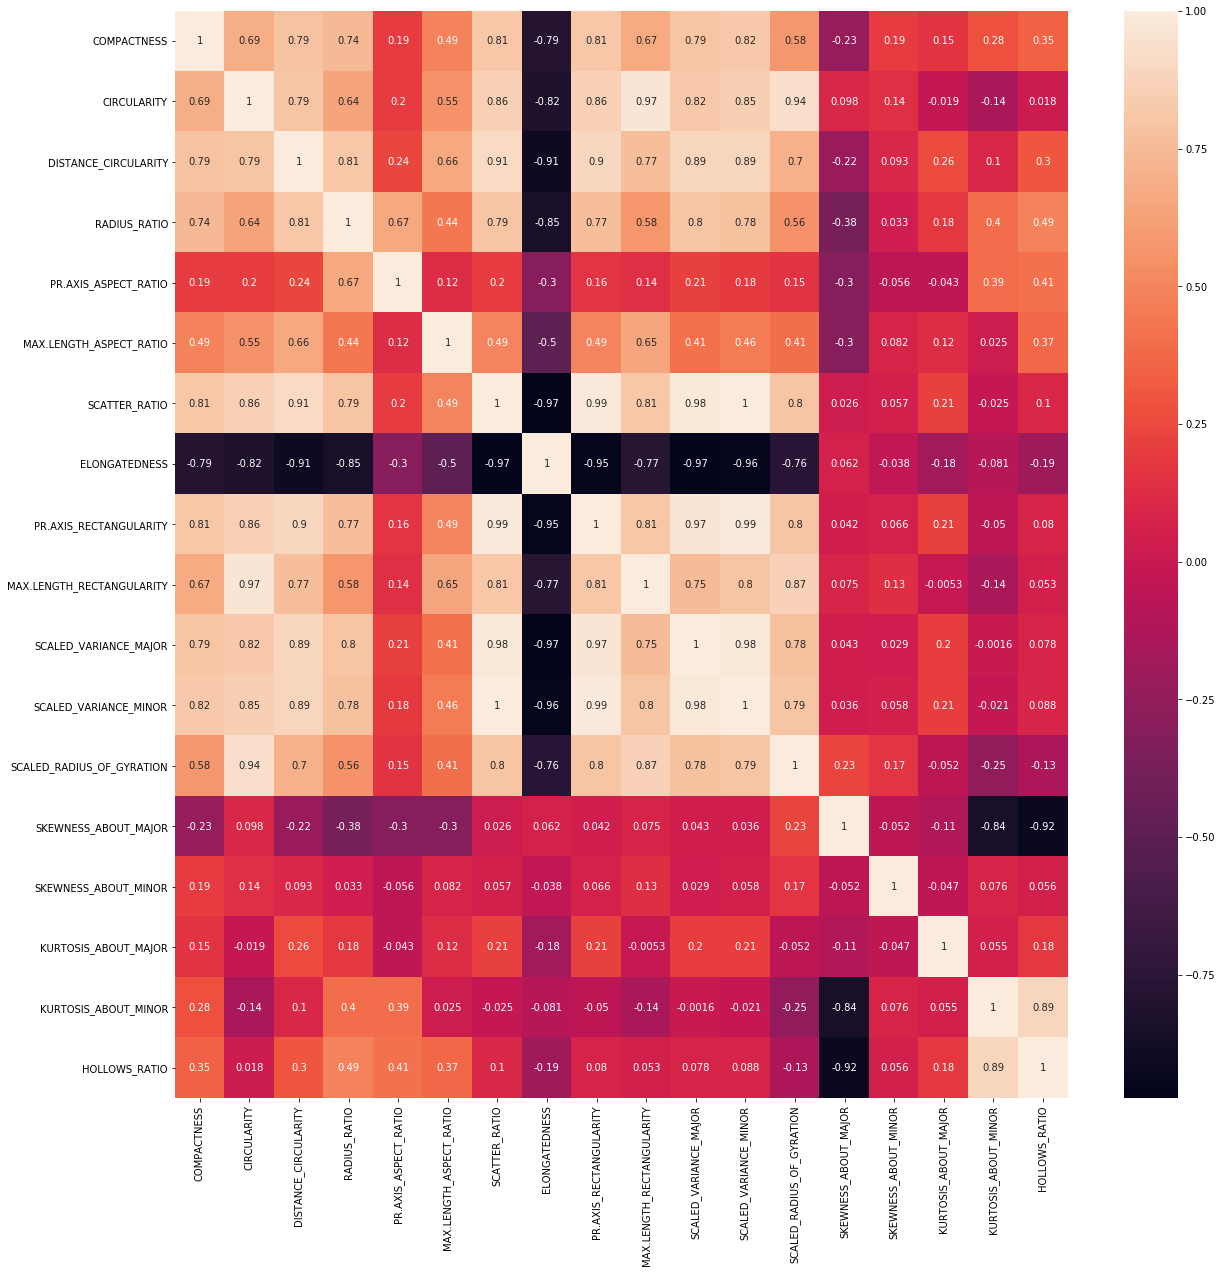

In [19]:
# heatmap for continuous data
data_corr = data_df.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(data_corr, annot=True)
plt.show()

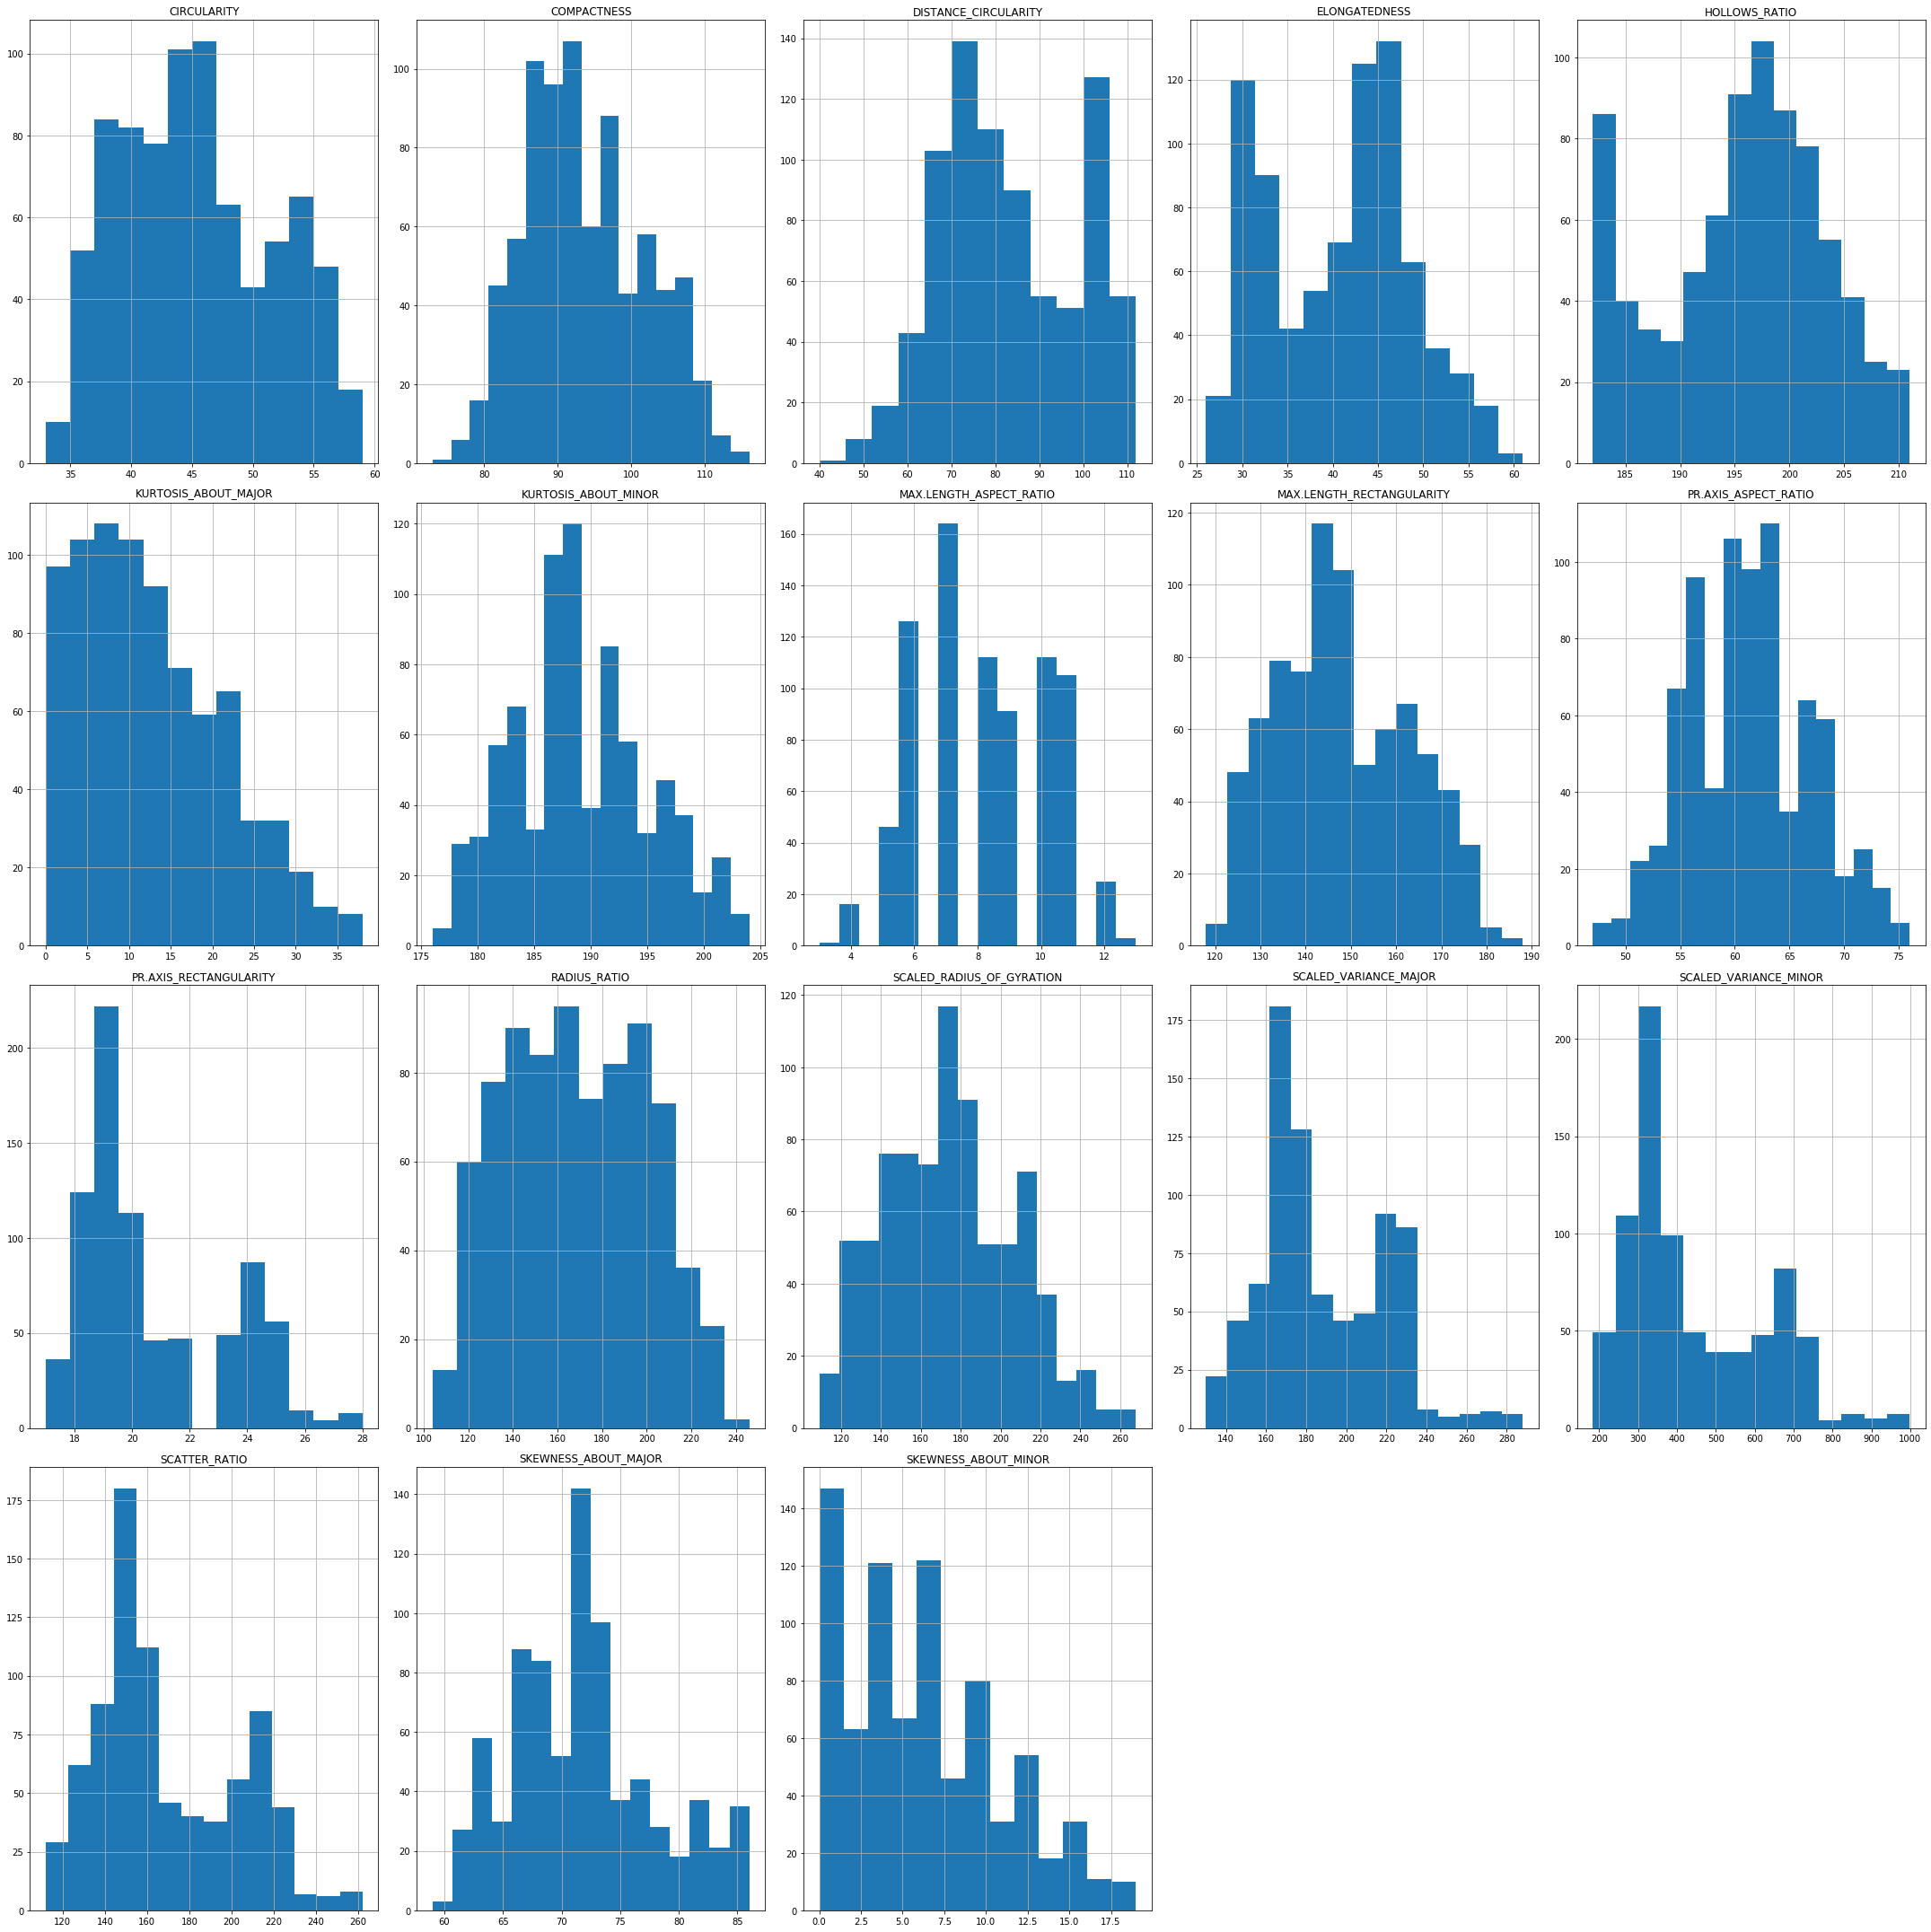

In [20]:
# plot histogram for continous data

data_df.hist(figsize=(30, 30), layout=(4,5), bins='auto')
plt.tight_layout()
plt.show()

In [21]:
# label encoder
encode = LabelEncoder()
data_df.Class = encode.fit_transform(data_df.Class)

In [22]:
X = data_df.iloc[:, :-1]
y = data_df.Class

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=44)

In [24]:
#Scale the data using Standard Scalar

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform (x_test)

LogisticRegression :
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        56
           1       0.62      0.58      0.60        55
           2       0.45      0.57      0.51        40
           3       1.00      0.96      0.98        50

    accuracy                           0.76       201
   macro avg       0.77      0.75      0.76       201
weighted avg       0.79      0.76      0.77       201



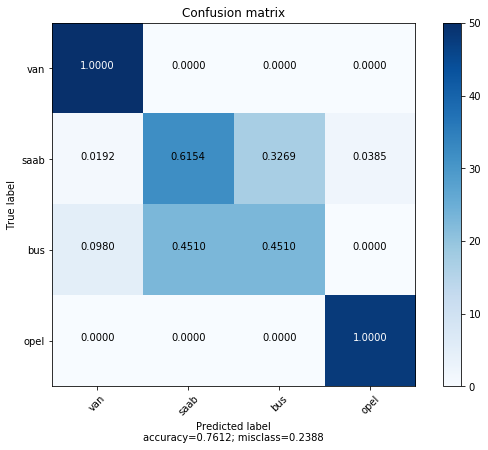

RandomForestClassifier :
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.56      0.54      0.55        54
           2       0.47      0.52      0.49        46
           3       0.94      0.96      0.95        47

    accuracy                           0.74       201
   macro avg       0.74      0.74      0.74       201
weighted avg       0.75      0.74      0.74       201



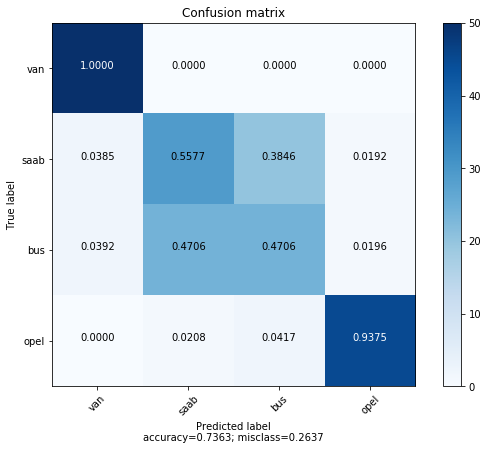

AdaBoostClassifier :
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        43
           1       0.37      0.40      0.38        47
           2       0.59      0.39      0.47        77
           3       0.67      0.94      0.78        34

    accuracy                           0.61       201
   macro avg       0.61      0.67      0.63       201
weighted avg       0.60      0.61      0.59       201



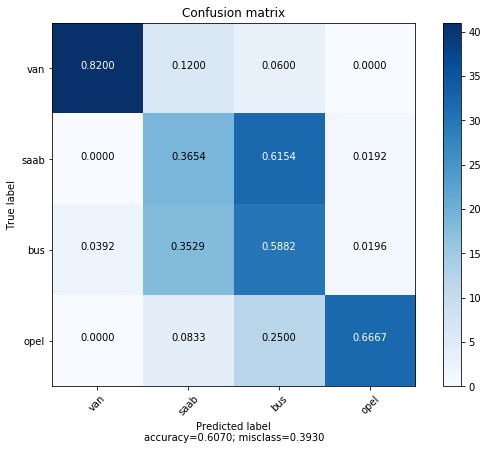

SVC :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.50      0.54      0.52        48
           2       0.57      0.51      0.54        57
           3       0.94      0.98      0.96        46

    accuracy                           0.75       201
   macro avg       0.75      0.76      0.75       201
weighted avg       0.74      0.75      0.74       201



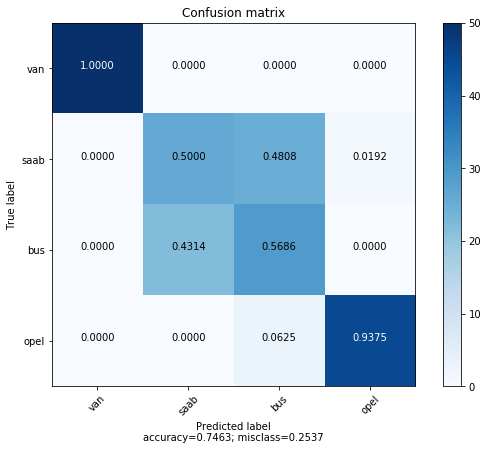

SVC :
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        53
           1       0.62      0.60      0.61        53
           2       0.53      0.56      0.55        48
           3       0.98      1.00      0.99        47

    accuracy                           0.78       201
   macro avg       0.78      0.78      0.78       201
weighted avg       0.78      0.78      0.78       201



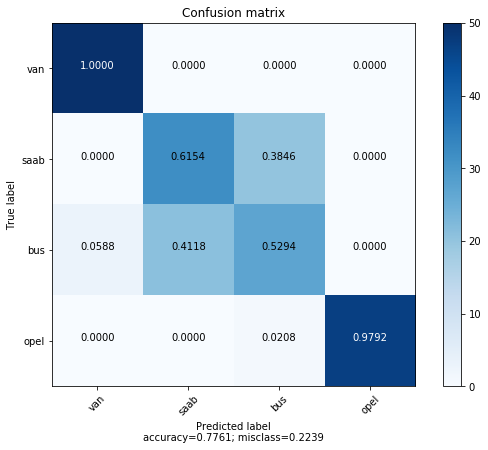

DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        48
           1       0.42      0.43      0.43        51
           2       0.39      0.36      0.37        56
           3       0.90      0.93      0.91        46

    accuracy                           0.64       201
   macro avg       0.65      0.66      0.65       201
weighted avg       0.63      0.64      0.64       201



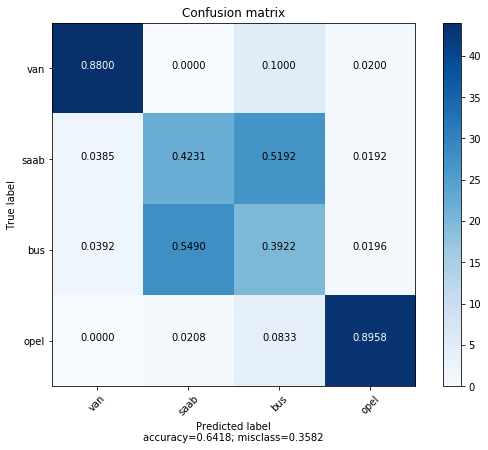

,f1 score,precision,recall_score
Logistic,0.756653,0.766591,0.752419
RandomForest,0.737731,0.741445,0.735537
AdaBoost,0.628699,0.610072,0.672133
SVC RBF,0.753621,0.751532,0.757175
SVC Linear,0.778831,0.780991,0.777417
Decision Tree,0.653467,0.647767,0.659991


In [25]:
model(X_train,y_train,X_test,y_test)